In [ ]:
pip install diffusers torch matplotlib

In [60]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_url = "6458524847_2f4c361183_k.png"
mask_url = "6458524847_2f4c361183_k_mask.png"


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [62]:
image = load_image(img_url).resize((1024, 1024))
mask_image = load_image(mask_url).resize((1024, 1024))

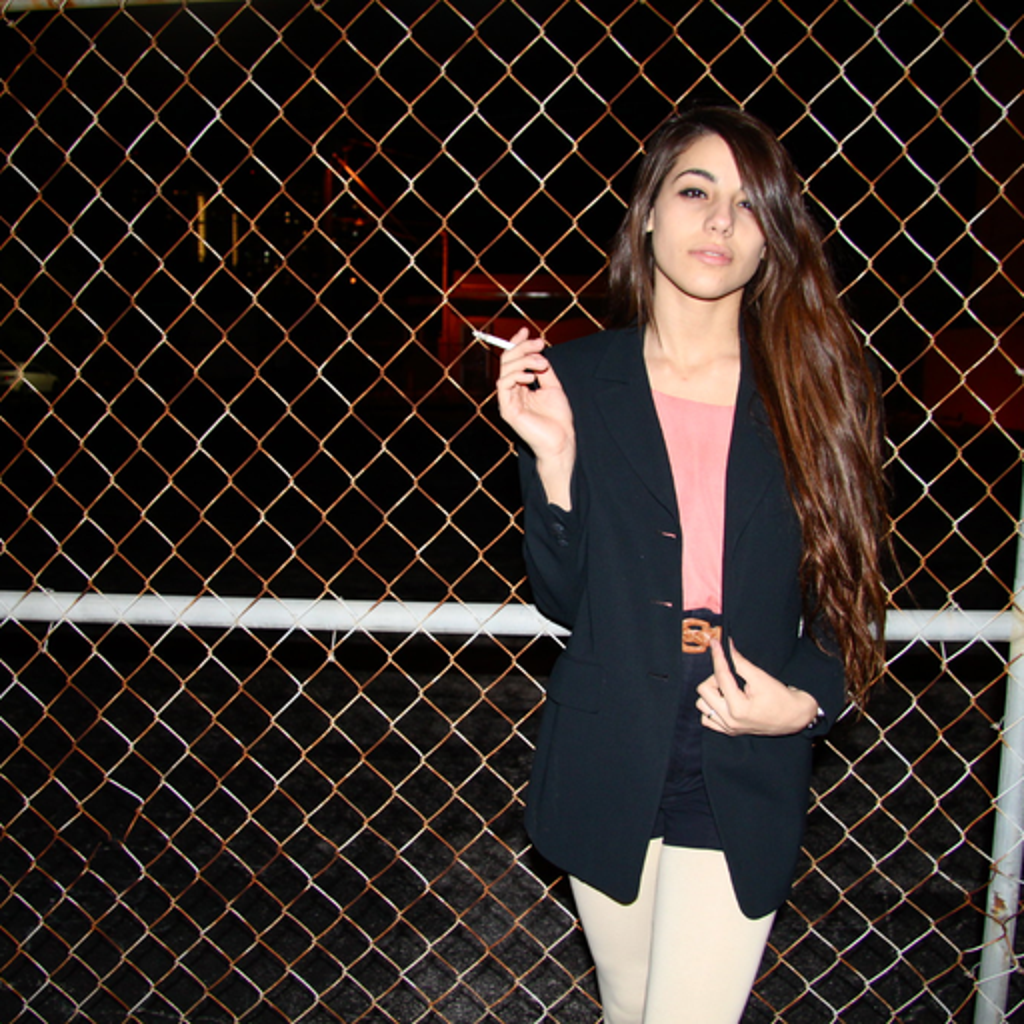

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load and display the original image
org_img = mpimg.imread(image)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(org_img)
plt.title('Original Image')
plt.axis('off')

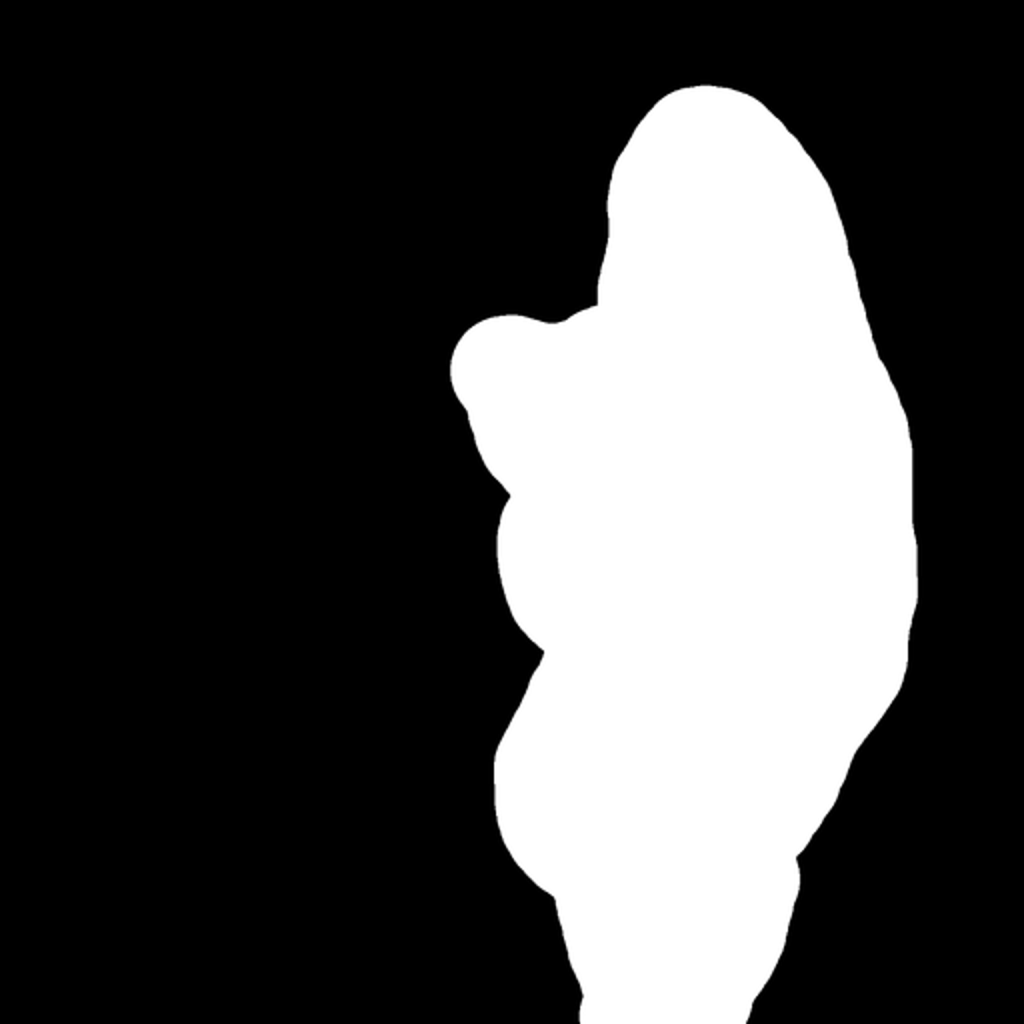

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load and display the original image
masked_img = mpimg.imread(mask_url)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(org_img)
plt.title('Masked Image')
plt.axis('off')

In [65]:
prompt = "an alien standing"
generator = torch.Generator(device="cuda").manual_seed(0)

generated_image = pipe(
  prompt=prompt,
  image=image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]

  0%|          | 0/19 [00:00<?, ?it/s]

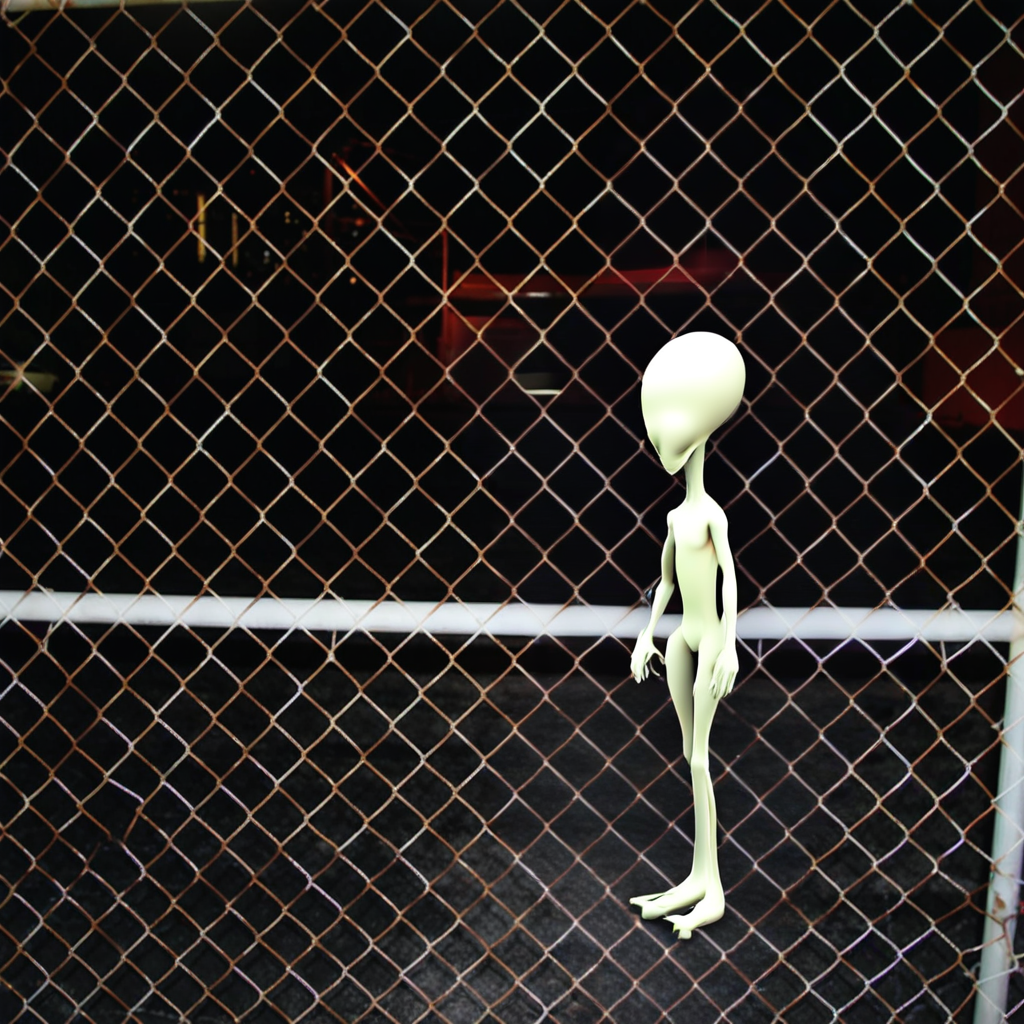

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load and display the original image
gen_img = mpimg.imread(generated_image)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gen_img)
plt.title('Inpainted Image')
plt.axis('off')

In [59]:
generated_image.save('output.png')